In [1]:
import os
import sys
import PIL
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
# Display plots inside the notebook:
%matplotlib inline 

In [2]:
# Display plots in external window: 
def show_external(img, cmap=None):
    %matplotlib qt
    plt.imshow(img, cmap)
    plt.show()

In [3]:
# Read in images from folder:
def get_images_from_folder(folder_name='camera_cal'):
    cwd = os.getcwd()
    path = '{}/{}/{}'.format(cwd, folder_name, 'calibration*.jpg')
    image_paths = glob.glob(path)
    images = []
    for image_path in image_paths:
        image = mpimg.imread(image_path)
        images.append(image)
    return images

In [4]:
distorted_cal_images = get_images_from_folder('camera_cal')

In [6]:
def calibrate_image(image, board_dims=(6,9)):  
    # Save the original image:
    distorted_image = np.copy(image)

    # Get the grayscale of the image:
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Store object points and image points from calibration images:
    imgpoints = []
    objpoints = []

    # Prepare object points, starting top left intersection (NOT corner of chessboard)
    # ending bottom right intersection (Not corner of chessboard)
    # ranges from (0,0,z-depth) to (7,5,z-depth)

    # Internal dimensions of the chessboard images (rows, cols):
    # NOTE: A standard chessboard with 64 total squares would have internal dimensions of (7,7)
    rows = board_dims[0]
    cols = board_dims[1]


    # Prepare object points:
    objp = np.zeros((cols*rows, 3), dtype=np.float32)
    objp[:,:2] = np.mgrid[0:cols, 0:rows].T.reshape(-1,2)

    # Find the chessboard corners:
    ret, corners = cv2.findChessboardCorners(gray, (cols, rows), None)

    # If corners are found, add object points and image points:
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        # Draw and display corners:
        image = cv2.drawChessboardCorners(image, (cols, rows), corners, ret)
        plt.imshow(image)

        # Calculate camera RMS by pixel, matrix, distortion coefficients, and rotational and translation vectors:
        rms, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
        # Get the undistorted "destination" (dst) image from the distorted image (img):
        undistorted_image = cv2.undistort(image, mtx, dist, None, mtx)
        # Store calibration data and original and undistorted image in a dictionary:
        calibration_data = {
            'original_image': distorted_image,
            'calibrated_image': undistorted_image,
            'rms': rms,
            'mtx': mtx,
            'dist': dist,
            'rvecs': rvecs,
            'tvecs': tvecs,
        }
    else:
        calibration_data = None
        
    return calibration_data



<class 'numpy.ndarray'>
(720, 1280, 3)
<class 'numpy.uint8'>


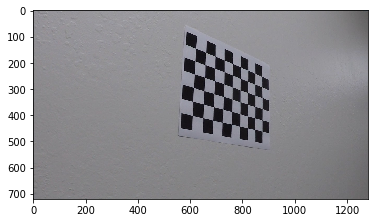

In [18]:
image = distorted_cal_images[3]
print(type(image))
print(image.shape)
print(type(image[0,0,0]))
plt.imshow(image)

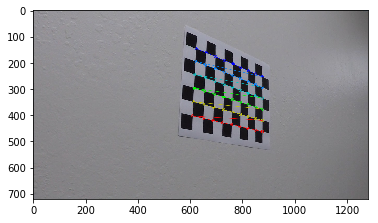

In [19]:
calibration_data = calibrate_image(image)

In [ ]:
# Read in an image and add a grayscaled version of that image:
original_image = mpimg.imread('./camera_cal/calibration1.jpg')
img = np.copy(original_image)
plt.imshow(img)

In [ ]:
undistorted_img = undistort_image(img)
plt.imshow(undistorted_img)

In [ ]:
# # REMOVE
# print(id(original_image))
# print(id(img))
# print(id(gray))

In [ ]:
# Read in an image:
image = mpimg.imread('./camera_cal/calibration1.jpg')
# image = np.zeros((100,100,3), dtype=np.uint8)

undistorted_image = get_undistorted_image(image)
print(undistorted_image)


In [ ]:
plt.imshow(dst)

In [ ]:
# # Using pickle:
# import pickle
# import numpy as np

# image = np.array([1,2,3])
# Print(image)

In [ ]:
# # Export data to pickle file:
# with open('pickled_image.p','wb') as pickle_out:
#     pickle.dump(image, pickle_out)    

In [ ]:
# # Import data from pickle file:
# with open('pickled_image.p','rb') as pickle_in:
#     new_image = pickle.load(pickle_in)    
#     print(new_image)

In [ ]:
# # REMOVE
# print(board_dims)
# print(num_h_lines)
# print(num_v_lines)

In [ ]:
# # REMOVE
# import sys
# print(sys.platform)
# print(sys.version)
# print(sys.executable)

In [ ]:
# %matplotlib inline

# # INTERNAL board dimensions:
# board_dims = (5,9)
# rows = board_dims[0]
# cols = board_dims[1]


# # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# objp = np.zeros((rows*cols,3), np.float32)
# objp[:,:2] = np.mgrid[0:cols, 0:rows].T.reshape(-1,2)

# # Arrays to store object points and image points from all the images.
# objpoints = [] # 3d points in real world space
# imgpoints = [] # 2d points in image plane.

# # Make a list of calibration images
# images = glob.glob('camera_cal/calibration*.jpg')

# # Step through the list and search for chessboard corners
# for idx, fname in enumerate(images):
#     img = cv2.imread(fname)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Find the chessboard corners
#     ret, corners = cv2.findChessboardCorners(gray, (cols,rows), None)

#     # If found, add object points, image points
#     if ret == True:
#         objpoints.append(objp)
#         imgpoints.append(corners)

#         # Draw and display the corners
#         cv2.drawChessboardCorners(img, (cols,rows), corners, ret)
#         #write_name = 'corners_found'+str(idx)+'.jpg'
#         #cv2.imwrite(write_name, img)
#         plt.imshow(img)
#         #cv2.waitKey(500)

